<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/sklearn-logo.png" style="height: 100px;" align=right>

# Introduction to Machine Learning

In this notebook you will learn about the the basics of machine learning.

We will start with **regression** problems, the task of predicting a real or continuous value. Linear regression uses one predictive variable to predict the outcome, e.g. predicting a person's weight based only on his/her height. You will learn how to: 
- fit a linear regression to data
- predict output values for new data
- measure the performance of the model

Then we will move on to **classification** problems, the task to decide to which of a predefined, finite set of categories an object belongs. You will learn how to:
- use k-nearest neighbours and logistic regression for classification
- train and tune models based on training and testing data
- evaluate the performance of the model

# Table of Content

- [Regression Problems](#Regression-Problems)
    - [Linear Regression](#Linear-Regression)
    - [Simple Linear Regression](#Simple-Linear-Regression)
        - [Learning Model Coefficients](#Learning-Model-Coefficients)
        - [Model Evaluation](#Model-Evaluation)
        - [Best Practice for Machine Learning](#Best-Practice-for-Machine-Learning)
        - [Exercise 1](#Exercise-1)
    - [Multidimensional Linear Regression](#Multidimensional-Linear-Regression)
        - [Exercise 2](#Exercise-2)
    - [Handling Categorical Predictors](#Handling-Categorical-Predictors)
        - [Exercise 3](#Exercise-3)
- [Classification Problems](#Classification-Problems)
    - [k-Nearest Neighbours (KNN)](#k-Nearest-Neighbours-(KNN))
        - [Algorithm](#Algorithm)
        - [Effect of choice 'k' on k-NN](#Effect-of-choice-'k'-on-k-NN)
        - [k-NN Hyperparameters](#k-NN-Hyperparameters)
        - [Exercise 4](#Exercise-4)
        - [Pros and Cons of k-NN](#Pros-and-Cons-of-k-NN)
        - [Exercise 5](#Exercise-5)
    - [Logistic Regression](#Logistic-Regression)
        - [Multiclass Logistic Regression](#Multiclass-Logistic-Regression)
        - [Exercise 6](#Exercise-6)
    - [Evaluation Metrics for Classification](#Evaluation-Metrics-for-Classification)
        - [Python can do it easily!](#Python-can-do-it-easily!)
        - [Python can do it even easier!](#Python-can-do-it-even-easier!)
        - [Exercise 7](#Exercise-7)
- [Resources](#Resources)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

sns.set()
warnings.filterwarnings("ignore")

# Regression Problems

A regression problem is when the output variable is a real or continuous value, such as "salary" or "weight". Many different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane which goes through the points.

Examples of regression tasks:
- Predicting salary of a person
- Predicting stock price
- Predicting probability of rain

## Linear Regression

### Motivation

<img src ="../images/linear_regression.png">

Why linear regression?
- Easy to use (requires very little tuning)
- Low cost of computation
- Easy to interpret
- Basis for many other methods

## Simple Linear Regression

A simple linear regression predicts a **continuous response** using a **single, continuous feature** (also called "predictor" or "input variable"). It takes the following form:

$$y = \beta_0 + \beta_1x$$

where
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x, also called slope

<img src="../images/slope_intercept.png">

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. Fitting a model to data means to *learn* the optimal values for these coefficients.

### Learning Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line that minimizes the cumulative distance from the data. The most common metric for this distance is the **residual sum of squares (RSS)**, also known as the **sum of squared residuals (SSR)** or the **sum of squared errors (SSE)**, is the sum of the squares of residuals (deviations predicted from actual empirical value:

<img src="../images/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is the line that minimizes the sum of squared residuals, i.e. the **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (angle) of the line (the change in $y$ divided by change in $x$)

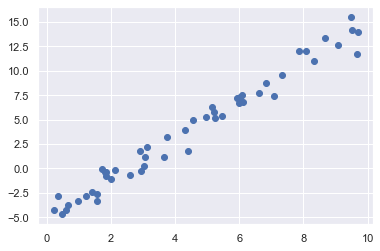

In [2]:
# Create random data
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = -5 + 2 * x + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

**Step 1 - Choose model hyperparameters**

Hyperparameters are model parameters that we select before fitting it to the data. These change the behaviour of our model. For a linear regression, the only hyperparameter we're interested in is whether or not to fit the intercept to our data. If we set this to `False`, then Python expects the data to be centered and simply sets $\beta_0 = 0$.

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

**Step 2 - Arrange data into a features matrix and target vector**

Scikit learn is an extremely flexible framework for machine learning. This flexibility comes at the cost of very strict requirements for features and target values.

- Features must be a 2D-array with the shape (number of samples, number of features), i.e. each row of $X$ represents a data entry and each column represents a feature
- Target values must be a 1D-array with the shape (number of samples, )

In case we only have one feature, like here, we need to first transform the variable.

<img src="../images/numpy_array.png">

In [4]:
print("Shape of x: {}".format(x.shape))
print(x)

Shape of x: (50,)
[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]


In [5]:
print("Shape of y: {}".format(y.shape))
print(y)

Shape of y: (50,)
[ 3.22926896 14.18565441  9.52423055  6.67206599 -3.35814918 -2.5999538
 -4.29896653 13.38064514  7.36591852  7.3984114  -4.26422614 14.01311476
 10.97193082 -0.1415415  -0.33250113 -0.40062968  0.24562734  5.18591626
  3.9701638   1.80012793  6.75788366 -2.39578176 -0.263442    1.13103024
  4.93392551 12.05975926 -1.07853448  6.28822167  7.2099274  -4.7161115
  7.51229264 -0.05148096 -3.73479418 15.5423544  11.69289556 11.98984947
  1.17932245 -3.34556507  8.77642131  1.81548096 -2.77890719  5.26065077
 -2.83433553 12.66813782 -0.63289397  7.74868864  2.14962364  5.73011153
  5.40444538 -0.78964346]


In [6]:
x = x[:,np.newaxis]
print("Shape of x: {}".format(x.shape))
print(x)

Shape of x: (50, 1)
[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]
 [0.20584494]
 [9.69909852]
 [8.32442641]
 [2.12339111]
 [1.81824967]
 [1.8340451 ]
 [3.04242243]
 [5.24756432]
 [4.31945019]
 [2.9122914 ]
 [6.11852895]
 [1.39493861]
 [2.92144649]
 [3.66361843]
 [4.56069984]
 [7.85175961]
 [1.99673782]
 [5.14234438]
 [5.92414569]
 [0.46450413]
 [6.07544852]
 [1.70524124]
 [0.65051593]
 [9.48885537]
 [9.65632033]
 [8.08397348]
 [3.04613769]
 [0.97672114]
 [6.84233027]
 [4.40152494]
 [1.22038235]
 [4.9517691 ]
 [0.34388521]
 [9.09320402]
 [2.58779982]
 [6.62522284]
 [3.11711076]
 [5.20068021]
 [5.46710279]
 [1.84854456]]


**Step 3 - Fit the model to your data**

In [7]:
model.fit(x, y)

LinearRegression()

We can inspect the parameters $\beta_0$, $\beta_1$ of the model.

In [8]:
# intercept, i.e. beta_0
model.intercept_

-4.903310725531115

In [9]:
# slope, i.e. beta_1
model.coef_

array([1.9776566])

**Step 4 - Visually inspect the fit**

We can apply the model to our input features and visually inspect the fit.

In [10]:
yfit = model.predict(x)

In [11]:
print("Shape of yfit: {}".format(yfit.shape))
yfit

Shape of yfit: (50,)


array([ 2.50380666, 13.89855351,  9.57301578,  6.9360983 , -1.81779778,
       -1.8182748 , -3.75461634, 12.22667899,  6.98467998,  9.09993334,
       -4.49622012, 14.27817548, 11.5595461 , -0.70397229, -1.30743726,
       -1.27619933,  1.11355607,  5.47456948,  3.63907845,  0.85620159,
        7.19703843, -2.14460118,  0.8743072 ,  2.34206845,  4.11618742,
       10.6247735 , -0.95444899,  5.26648059,  6.8126151 , -3.98468107,
        7.11184014, -1.53092914, -3.6168136 , 13.86238673, 14.19357491,
       11.08401279,  1.12090359, -2.97169172,  8.62846889,  3.80139412,
       -2.48981352,  4.88958812, -4.22322387, 13.07992422,  0.21446866,
        8.19910496,  1.26126394,  5.38184882,  5.9087412 , -1.24752438])

The model applies the learned coefficients $\beta_0$, $\beta_1$ to each row of our feature matrix (a "row" here is simply a single value) and computes the output. We could do this manually as well to confirm that scikit-learn is doing what we expect it to, e.g.

In [12]:
model.intercept_ + model.coef_ * x[0]

array([2.50380666])

Let's plot the raw data and the predicted values using matplotlib

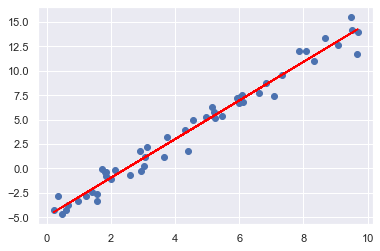

In [13]:
plt.scatter(x, y);
plt.plot(x, yfit, color='red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are ``coef_`` and ``intercept_``:

In [14]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [1.9776566]
Model intercept: -4.903310725531115


We see that the results are very close to the inputs, as we might hope. Can we measure how close, though?

### Model Evaluation

The quality of a linear regression fit is most commonly described with the **mean squared error (MSE)**, which computes the average of the squared differences between observed and predicted target values:

$$MSE = \frac{1}{N} \cdot \sum_i^N (y_i - \hat y_i)^2$$

where:
- $y_i$ represents the observed target value for $x_i$
- $\hat y_i$ represents the predicted target value for $x_i$ as per the learned parameters.
- $N$ is equal to the number of observations

We can easily compute the mean squared error with scikit-learn.

In [15]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y, y_pred=yfit)

0.8230711437486878

Another statistical measure is the **coefficient of determination** (also referred to as $R^2$ or R-Squared). $R^2$ describes the ratio of the mean squared error of the model compared to the mean squared error of the **null model**, which is simply a horizontal line through the mean of the observed target variables ($\beta_0 = mean(y_1, ..., y_N)$ and $\beta_1 = 0$)

$$R^2 = 1 - \frac{MSE_{model}}{MSE_{null}}$$

where
- $MSE_{model} = \frac{1}{N} \cdot \sum_i^N (y_i - \hat y_i)^2$
- $MSE_{null} = \frac{1}{N} \cdot \sum_i^N (y_i - \bar y)^2$
- $\bar y = mean(y_1, ..., y_N)$, the mean of all observed target values

In other words, $R^2$ is one minus the the ratio of the blue area to the red area.

<img src="../images/Coefficient_of_Determination.svg" />

Another way of phrasing this is that $R^2$ is the fraction of variance in the data that can be explained by the model. It (usually) lies between $0$ and $1$, and higher is better because it means that more variance is explained by the model. The remaining variance in data is due to complex relationships between features and target values not considered by the model and random noise.

Note that a perfect $R^2 = 1$ should be regarded with suspicion. This means that:

- The model fully describes the relationship between features and target values
- There is no randomness in the data

both of which are extremely unlikely in any real-life scenario.

We can also use scikit-learn to compute the $R^2$ score.

In [16]:
from sklearn.metrics import r2_score

r2_score(y_true=y, y_pred=yfit)

0.9749140085676858

*Note: $R^2$ can be negative in some situations. In particular, if no intercept was included in the fit, $R^2$ can become negative. In these cases, the learned model is worse than the null model.*

### Best Practice for Machine Learning

In the previous examples and exercises, we have assessed the performance of the trained model on the data it was trained on. This is problematic, as we have no guarantee that the model will capture the true relationship between the features and target values. To solve this, we can split our data into a training and a test data set. This allows us to train the model on one part of the data and then assess its performance on data it has never seen to determine how well it generalizes to new data.

We can use the `sklearn.model_selection.train_test_split` function to divide the data into 2 sets for us. 

In [17]:
from sklearn.model_selection import train_test_split

# Generate random data
rng = np.random.RandomState(42)
X = 10 * rng.rand(100)
y = 0.5 * X - 1.1 + np.random.randn(100)
X = X[:, np.newaxis]

In [18]:
print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (100, 1)
y.shape (100,)


Now we divide the data into train and test.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (75, 1)
y_train.shape (75,)
X_test.shape (25, 1)
y_test.shape (25,)


We now have a dataset of 75 entries that we can train the model on and a test dataset of 25 entries that we can use to assess the performance of the model.

In [21]:
model = LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: -1.455546956499818
Slope:     [0.60636144]


In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

Train R2 Score: 0.763219309702478
Test R2 Score:  0.4928610118191413


The performance on the training data will typically be better than the test score. In general, we want to make sure that training and test performance are similar and maximal. We will go into more detail about tuning models, overfitting, and assessing their performance at a later point in this course. For now, keep in mind that we should separate our data into a training and a test set.

There is no ironclad rule about how large these two subsets of our data should be. In general, more training data will result in a model that better captures the true relationship between features and target.

### Exercise 1
#### Create your first Linear Regression model

Given the following X and y, train a linear regression model and show the results.

First, split the data into train and test with `test_size=0.2`.

In [23]:
# The data
rng = np.random.RandomState(42)
X = 100 * rng.rand(100)
y = 26 * X - 722 + rng.randn(100)*200

In [24]:
X.shape

(100,)

In [25]:
y.shape

(100,)

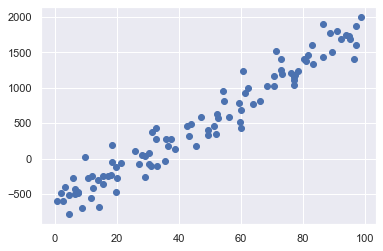

In [26]:
plt.scatter(X, y);

In [27]:
# MC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.shape, y_test.shape

((80,), (20,))

Create and fit the model (on the train data).

Hint: use `np.newaxis`

In [28]:
### Your code here

In [29]:
# MC
# Reshape X
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

Show the trained parameters (intercept and slope).

Hints: 
- Trained parameters have a trailing underscore
- Type "model." and then press TAB to have Jupyter show you all available methods and variables

In [30]:
### Your code here

In [31]:
# MC
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: -660.3059957968967
Slope:     [24.95950521]


Show the MSE and R2 for the predicted target values $\hat{y_i}$ on the train and test data.

Hints: 
- Metrics can be found in the module `sklearn.metrics`. Use TAB to view available metrics.

In [32]:
### Your code here

In [33]:
# MC
y_fit = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train data:")
print("Mean Squared Error = {}".format(sklearn.metrics.mean_squared_error(y_train, y_fit)))
print("R^2 = {}".format(sklearn.metrics.r2_score(y_train, y_fit)))
print()
print("Test data:")
print("Mean Squared Error = {}".format(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print("R^2 = {}".format(sklearn.metrics.r2_score(y_test, y_pred)))

Train data:
Mean Squared Error = 30355.338980142267
R^2 = 0.9491507220959862

Test data:
Mean Squared Error = 40803.083289627815
R^2 = 0.9224949451952078


Plot the original datapoints and the regression line

In [34]:
### Your code here

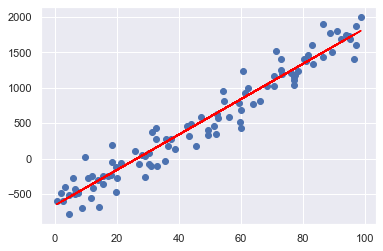

In [35]:
# MC
plt.scatter(X, y)
plt.plot(X_train, y_fit, c='red')
plt.plot(X_test, y_pred, c='red');

## Multidimensional Linear Regression

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$

where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize. Nonetheless, the general steps for fitting a model to data outlined for the one-dimensional case above remain the same.

In [36]:
rng = np.random.RandomState(42)
X = 10 * rng.rand(100, 3)
# b0 = 0.5, b1 = 1.5, b2 = -2, b3 = 1
y = 0.5 + 1.5 * X[:, 0] - 2 * X[:, 1] + 1 * X[:, 2] + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)

print("Intercept:    {}".format(model.intercept_))
print("Coefficients: {}".format(model.coef_))

Intercept:    1.19224285902982
Coefficients: [ 1.45640861 -2.03399636  0.91750724]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data. In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data.

### Exercise 2
#### Effects of Advertising on Sales

Imagine that your company wants to increase sales on a certain product. You cannot increase sales directly, but you can adjust advertising.

The advertising dataset in the file `data/advertising.csv` contains information on money spent on advertising via various channels as well as revenue for a product. Each row represents a separate time interval, e.g. a week's worth of sales. For the sake of simplicity we'll ignore confounding factors like seasonality.

The features are:
- TV: advertising dollars spent on TV
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

and the response is:
- Sales: sales of a single product in a given market

All numbers are in thousands of dollars, e.g. $14.4$ is equivalent to $\$14,400$.

In [37]:
sales = pd.read_csv("../data/advertising.csv", index_col=0)
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Explore the data and use simple, one-dimensional linear regression models to find answers to the following.
- What is the relation between each ad type and the sales?
- How well do the individual simple linear regression models describe this relation? (Hint: R2 score)

In [38]:
### Your code here

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


TV ad intercept: 7.032593549127695
TV ad slope:     0.04753664043301975
R2 for TV:       0.611875050850071


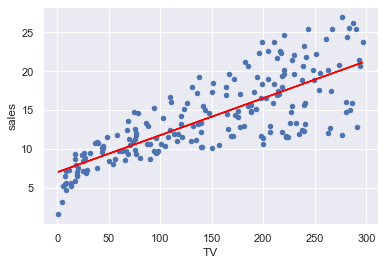

In [39]:
# MC
model_tv = LinearRegression().fit(sales[["TV"]], sales["sales"])
print("TV ad intercept: {}".format(model_tv.intercept_))
print("TV ad slope:     {}".format(model_tv.coef_[0]))

r2score_tv = r2_score(
    sales["sales"], model_tv.predict(sales[["TV"]]))
print("R2 for TV:       {}".format(r2score_tv))

sales.plot(x="TV", y="sales", kind="scatter")
plt.plot(sales[["TV"]], model_tv.predict(sales[["TV"]]), c='red');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Radio ad intercept: 9.311638095158283
Radio ad slope:     0.20249578339243965
R2 for Radio:       0.33203245544529525


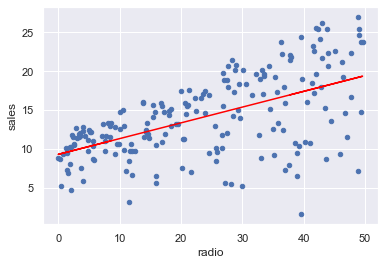

In [40]:
# MC
model_radio = LinearRegression().fit(sales[["radio"]], sales["sales"])
print("Radio ad intercept: {}".format(model_radio.intercept_))
print("Radio ad slope:     {}".format(model_radio.coef_[0]))

r2score_radio = r2_score(
    sales["sales"], model_radio.predict(sales[["radio"]]))
print("R2 for Radio:       {}".format(r2score_radio))

sales.plot(x="radio", y="sales", kind="scatter")
plt.plot(sales[["radio"]], model_radio.predict(sales[["radio"]]), c='red');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Newspaper ad intercept: 12.35140706927816
Newspaper ad slope:     0.05469309847227336
R2 for Newspaper:       0.05212044544430516


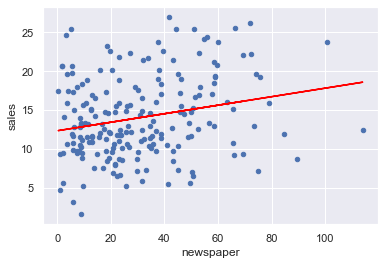

In [41]:
# MC
model_newspaper = LinearRegression().fit(sales[["newspaper"]], sales["sales"])
print("Newspaper ad intercept: {}".format(model_newspaper.intercept_))
print("Newspaper ad slope:     {}".format(model_newspaper.coef_[0]))

r2score_newspaper = r2_score(
    sales["sales"], model_newspaper.predict(sales[["newspaper"]]))
print("R2 for Newspaper:       {}".format(r2score_newspaper))

sales.plot(x="newspaper", y="sales", kind="scatter")
plt.plot(sales[["newspaper"]], model_newspaper.predict(sales[["newspaper"]]), c='red');

Let's see if we can improve the model performance with a multiple linear regression
- Train a multiple linear regression model on all ad types simultaneously. How well does it perform?
- How do the coefficients change versus the simple linear regression?

In [42]:
### Your code here

In [43]:
# MC
model = LinearRegression().fit(sales[["TV", "radio", "newspaper"]], sales["sales"])

r2score = r2_score(
    sales["sales"], model.predict(sales[["TV", "radio", "newspaper"]]))
print("R2 of MLR:        {}".format(r2score))
print()
print("TV ad SLR:        {}".format(model_tv.coef_[0]))
print("TV ad MLR:        {}".format(model.coef_[0]))
print()
print("Radio ad SLR:     {}".format(model_radio.coef_[0]))
print("Radio ad MLR:     {}".format(model.coef_[1]))
print()
print("Newspaper ad SLR: {}".format(model_newspaper.coef_[0]))
print("Newspaper ad MLR: {}".format(model.coef_[2]))

R2 of MLR:        0.8972106381789522

TV ad SLR:        0.04753664043301975
TV ad MLR:        0.0457646454553976

Radio ad SLR:     0.20249578339243965
Radio ad MLR:     0.18853001691820448

Newspaper ad SLR: 0.05469309847227336
Newspaper ad MLR: -0.0010374930424763285


What are the expected sales given a new budget of `TV=100`, `Radio=25` and `Newspaper=25`?

In [44]:
### Your code here

In [45]:
# MC
model.predict(X=[[100, 25, 25]])

array([12.20266701])

## Handling Categorical Predictors

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**.

In [46]:
# set a seed for reproducibility
np.random.seed(42)

# assign roughly one third of observations to each group
nums = np.random.rand(len(sales))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
sales_area = sales.copy()
sales_area['Area'] = 'rural'
sales_area.loc[mask_suburban, 'Area'] = 'suburban'
sales_area.loc[mask_urban, 'Area'] = 'urban'
sales_area.head()

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,suburban
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,urban
4,151.5,41.3,58.5,18.5,suburban
5,180.8,10.8,58.4,12.9,rural


We have to represent Area numerically, but we can't simply code it as `0=rural`, `1=suburban`, `2=urban` because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create can use **dummy variables**.

Note: For scikit-learn, we need to represent all data **numerically**. We can simply create a **dummy variable** that represents the categories as a binary value (0 or 1).

In [47]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(sales_area.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
sales_area = pd.concat([sales_area, area_dummies], axis=1)
sales_area.head()

,TV,radio,newspaper,sales,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,suburban,1,0
2,44.5,39.3,45.1,10.4,urban,0,1
3,17.2,45.9,69.3,9.3,urban,0,1
4,151.5,41.3,58.5,18.5,suburban,1,0
5,180.8,10.8,58.4,12.9,rural,0,0


Here is how we interpret the coding:
- **rural** is coded as `Area_suburban=0` and `Area_urban=0`
- **suburban** is coded as `Area_suburban=1` and `Area_urban=0`
- **urban** is coded as `Area_suburban=0` and `Area_urban=1`

Why do we only need **two dummy variables**, not **three**? Because two dummies captures all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with $k$ levels, you create $k-1$ dummy variables.)

Let's include the two new dummy variables in the model.

In [48]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']
X = sales_area[feature_cols]
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
results = zip(feature_cols, lm.coef_)
setResults = set(results)
print(setResults)

{('TV', 0.04576209238710782), ('radio', 0.18875111021395186), ('Area_urban', 0.05457487522719181), ('Area_suburban', 0.007378783849821969), ('newspaper', -0.0011296588545309516)}


How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of $127.28$ (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of $248.93$ (as compared to rural).

A final note about dummy encoding: If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

### Exercise 3

#### Train and test the advertising dataset

Train a multiple linear regression on the advertising dataset as above, which now includes a new categorical feature **Duration** with three possible observations: **short**, **medium** or **long**. In this exercise, reserve a fraction of the data as a test set to assess the performance. Do this with the following splits:
- Training: 50%, Test: 50%
- Training 95%, Test: 5%
- Training 5%, Test: 95%

Hint: The `test_size` argument of `train_test_split` takes a number between 0 and 1 indicating the relative size of the test set, e.g. 0.3 corresponds to *reserve 30% of the data as a test set*.

In [49]:
# set a seed for reproducibility
np.random.seed(42)

# assign roughly one third of observations to each group
nums = np.random.rand(len(sales))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
sales_dur = sales_area.copy()
sales_dur['duration'] = 'short'
sales_dur.loc[mask_suburban, 'duration'] = 'medium'
sales_dur.loc[mask_urban, 'duration'] = 'long'
sales_dur.head()

,TV,radio,newspaper,sales,Area,Area_suburban,Area_urban,duration
1,230.1,37.8,69.2,22.1,suburban,1,0,medium
2,44.5,39.3,45.1,10.4,urban,0,1,long
3,17.2,45.9,69.3,9.3,urban,0,1,long
4,151.5,41.3,58.5,18.5,suburban,1,0,medium
5,180.8,10.8,58.4,12.9,rural,0,0,short


In [50]:
### Your code here

In [51]:
# MC
dur_dummies = pd.get_dummies(sales_dur.duration, prefix='duration').iloc[:, 1:]
sales_dur = pd.concat([sales_dur, dur_dummies], axis=1)
sales_dur.head()

,TV,radio,newspaper,sales,Area,Area_suburban,Area_urban,duration,duration_medium,duration_short
1,230.1,37.8,69.2,22.1,suburban,1,0,medium,1,0
2,44.5,39.3,45.1,10.4,urban,0,1,long,0,0
3,17.2,45.9,69.3,9.3,urban,0,1,long,0,0
4,151.5,41.3,58.5,18.5,suburban,1,0,medium,1,0
5,180.8,10.8,58.4,12.9,rural,0,0,short,0,1


In [52]:
# MC
X = sales_dur[["TV", "radio", "newspaper", "Area_suburban", "Area_urban", "duration_medium", "duration_short"]]
y = sales_dur["sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=101)
model = LinearRegression().fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================")    

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=101)
model = LinearRegression().fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("=== Test Size 5% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================") 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.95, random_state=101)
model = LinearRegression().fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("=== Test Size 95% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================") 

=== Test Size 50% ===
   R2 Train: 0.883
   R2 Test:  0.908
=== Test Size 5% ===
   R2 Train: 0.893
   R2 Test:  0.986
=== Test Size 95% ===
   R2 Train: 0.994
   R2 Test:  0.396


We can use the following rules of thumb regarding the train and test performances:
- If $R^2_{train} \approx R^2_{test}$ and the performance is good, then our model is optimally trained.
- If $R^2_{train} \approx R^2_{test}$ but the performance is poor
    - We need more training data or
    - The algorithm doesn't accurately capture the relationship between features and target value, e.g. trying to perform a linear regression on non-linear data.
- If $R^2_{train} \gg R^2_{test}$ then the model is most likely overfitting on the data. We will talk about solutions to this problem soon.
- If $R^2_{train} \ll R^2_{test}$ then we most likely do not have sufficient test data to correctly assess the performance. More robust performance assessments, like **cross-validation** will solve this problem for us.

# Classification Problems

A classification problem is when the output variable is a category, such as "approve" or "reject", or a set of colours ("red", "blue", "yellow", etc). A classification model attempts to draw some conclusion from observed values. Given one or more inputs (features), a classification model will try to predict the value of one or more outcomes (class).

Examples of classification tasks:
- predicting the gender of a person
- predicting the brand of a car
- predicting the alphabet of a handwriting

## k-Nearest Neighbours (KNN)

k-Nearest Neighbours (KNN) falls in the **supervised learning** family of algorithms and it is a famous classification algorithm because it is easy to understand and its good performance, but it is computationally expensive. The KNN algorithm classifies an unlabelled test sample based on the majority of similar samples among the $k$ number of its nearest neighbors. 

### Algorithm

<img src='../images/knn2.jpg'/>
 
The basic KNN classifier steps can be described as follows:

- **Training phase:** The training samples and the class labels of these samples are stored. no missing data allowed. No non-numeric features allowed in case of using Euclidian distance. In case of categorical features new distance function should be defined.<br><br>

- **Classification phase:** Each test sample is classified using majority vote of its neighbors by the following steps:
    1. Distances from the test sample to all stored training sample are calculated using a specific distance function or similarity measure.
    2. The $K$ nearest neighbors of the test sample are selected, where $K$ is a pre-defined small integer.
    3. The most repeated class of these $K$ neighbors is assigned to the test sample. In other words, a test sample is assigned to the class *c* if it is the most frequent class label among the $K$ nearest training samples.

In [53]:
# Load iris dataset
iris = pd.read_csv("../data/iris.csv", index_col=0)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [54]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [55]:
# class distribution
iris.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

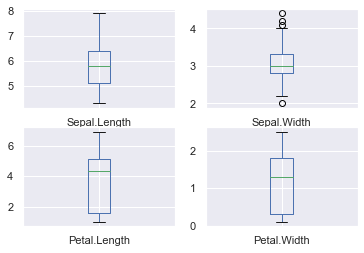

In [56]:
# box and whisker plots
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

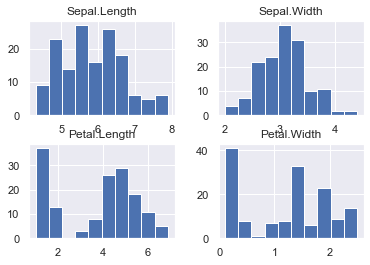

In [57]:
# histograms
iris.hist();

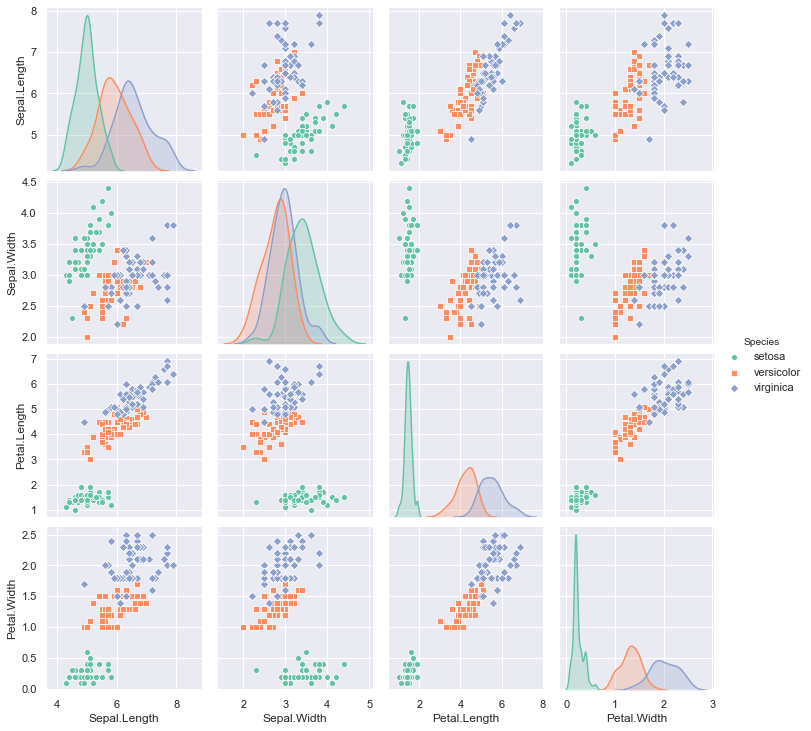

In [58]:
sns.pairplot(iris, kind="scatter", hue="Species", markers=["o", "s", "D"], palette="Set2");

#### Split data into features X and class y

In [59]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [60]:
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [61]:
y.head()

1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: Species, dtype: object

#### Split data into train and test

In [62]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


#### Create classifier object

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

#### Train the classifier (fit the estimator) using the training data

In [65]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Use the trained k-NN classifier model to classify new, previously unseen objects

In [66]:
# first example: a small flower with sepal-length=2, 
#            sepal-width=3.2, petal-length=1.5, petal-width=0.5
species_prediction = knn.predict([[2, 3.2, 1.5, 0.5]])
print("Predicted species:", species_prediction[0])

Predicted species: setosa


In [67]:
# second example: a larger flower with sepal-length=2.5, 
#          sepal-width=5, petal-length=4, petal-width=4
species_prediction = knn.predict([[2.5, 5, 4, 4]])
print("Predicted Species:", species_prediction[0])

Predicted Species: virginica


#### Estimate the accuracy of the classifier on future data, using the test data

In [68]:
# accuracy
knn.score(X_test, y_test)

0.8947368421052632

### Effect of choice 'k' on k-NN

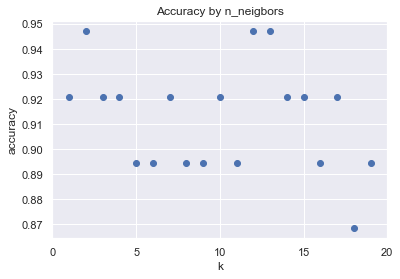

In [69]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### k-NN Hyperparameters

KNeighborsClassifier can receive hyperparameters such as:

- `n_neighbors` : int, optional (default = 5)
    Number of neighbors to use.
    
- `p` : integer, optional (default = 2)
    Power parameter for the Minkowski metric. When p = 1, this is
    equivalent to using manhattan_distance (l1), and euclidean_distance
    (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

- `metric` : string or callable, default 'minkowski'
    the distance metric to use for the tree.  The default metric is
    minkowski, and with p=2 is equivalent to the standard Euclidean
    metric. See the documentation of the DistanceMetric class for a
    list of available metrics.
    
To view to list of all the hyperparameters for KNeighborsClassifier you can run the command `?KNeighborsClassifier` These parameters help the user to change the distance function in k-NN algorithm.

In [70]:
# ?KNeighborsClassifier

### Exercise 4

#### k-NN classification with different p for Minkowski metric

Try to classify iris data using KNN for `n_neighbors=7` and `test_size=0.3` using both Manhattan distance (`p=1`) and Euclidean distance (`p=2`). Name these models as `M_knn` and `E_knn`. Compare their accuracy scores. Which model is better?

In [71]:
# MC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

M_knn = KNeighborsClassifier(n_neighbors=7, p=1)
E_knn = KNeighborsClassifier(n_neighbors=7, p=2)

M_knn.fit(X_train, y_train)
E_knn.fit(X_train, y_train)

print("****** Manhattan Distance ******")
print("Manhatan: Accuracy: {}".format(M_knn.score(X_test, y_test)))

print("****** Euclidian Distance ******")
print("Euclidian: Accuracy: {}".format(E_knn.score(X_test, y_test)))

****** Manhattan Distance ******
Manhatan: Accuracy: 0.9555555555555556
****** Euclidian Distance ******
Euclidian: Accuracy: 0.9555555555555556


### Pros and Cons of k-NN

<div class="alert alert-block alert-success">
    <p>
    <b>Pros</b>
    <p>
    As you can already tell from the previous section, one of the most attractive features of the k-nearest neighbor algorithm is that is <b>simple to understand</b> and <b>easy to implement</b>. Furthermore, k-NN works just as easily with <b>multiclass datasets</b> whereas other algorithms are hardcoded for the binary setting. Finally, as we mentioned earlier, the <b>non-parametric nature</b> of KNN gives it an edge in certain settings where the data may be highly “unusual”.
</div>

<div class="alert alert-block alert-danger">
    <p>
    <b>Cons</b>
    <p>
    One of the obvious drawbacks of the k-NN algorithm is the <b>computationally expensive</b> testing phase which is impractical in industry settings. Furthermore, k-NN can <b>suffer from skewed class distributions</b>. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). Finally, the accuracy of k-NN can be severely degraded with <b>high-dimension data</b> because there is little difference between the nearest and farthest neighbor.

### Exercise 5
#### Classifying fruits with k-NN

Load the fruits data file and apply k-NN to classify fruits.

1. Load Data
2. Examine data
3. Create train-test split
4. Create classifier object
5. Train the classifier (fit the estimator) using the training data for `k=5`
6. Estimate the accuracy of the classifier on future data, using the test data
7. Compare the accuracy of your model for different values of $k$ on train and test
8. Compare the accuracy of your model for different distance metrics on train and test

In [72]:
fruits = pd.read_table('../data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [73]:
#  - 2. Examine data
# your code here

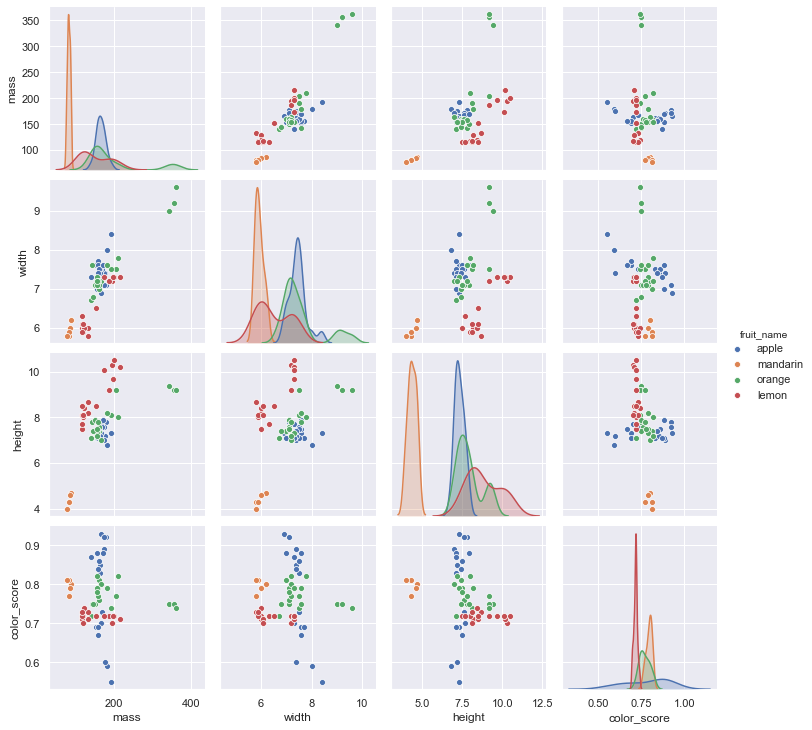

In [74]:
# MC
#  - 2. Examine data
sns.pairplot(fruits[[c for c in fruits.columns if not c == "fruit_label"]], hue='fruit_name');

In [75]:
X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

In [76]:
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [77]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

In [78]:
#  - 3. Create train-test split
# your code here

In [79]:
# MC
#  - 3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
# your code here

In [81]:
# MC

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Accuracy for k = 5 on train set: {}".format(knn.score(X_train, y_train)))
print("Accuracy for k = 5 on test data: {}".format(knn.score(X_test, y_test)))

Accuracy for k = 5 on train set: 0.7954545454545454
Accuracy for k = 5 on test data: 0.5333333333333333


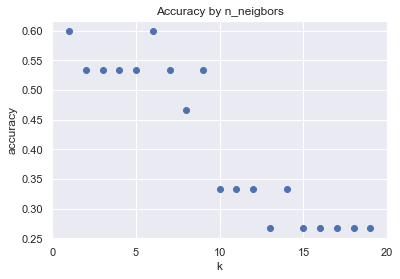

In [82]:
# MC
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [83]:
# MC 

M_knn = KNeighborsClassifier(n_neighbors=6,p=1)
E_knn = KNeighborsClassifier(n_neighbors=6, p=2)

M_knn.fit(X_train, y_train)
E_knn.fit(X_train, y_train)

print("****** Manhattan Distance ******")
print("Manhatan: Accuracy: {}".format(M_knn.score(X_test, y_test)))

print("****** Euclidian Distance ******")
print("Euclidian: Accuracy: {}".format(E_knn.score(X_test, y_test)))

****** Manhattan Distance ******
Manhatan: Accuracy: 0.6
****** Euclidian Distance ******
Euclidian: Accuracy: 0.6


## Logistic Regression

#### Can we use Linear regression to predict a class?

In a classification problem the values $y$ that we want to predict take on only a small number of discrete values


#### Binary Classification

For now, we will focus on the binary classification problem in which $y$
can take on only two values, $0$ and $1$.

We will see later how to use a binary classifiers for the multiple-class case.

For instance, if we are trying to build a spam classifier for email, then $x$ represents a mail (frequency of each word for instance), and $y$ may be $1$ if it is a piece of spam mail, and $0$ otherwise. $0$ is also called the
negative class, and $1$ the positive class, and they are sometimes also denoted by the symbols $-$
and $+$. 


#### Linear Regression limitation

In linear regression, the prediction is given by

$$\hat{y} = \beta_0 + \beta_1 x_1 + \cdots + \beta_m x_m$$

$$\hat{y} = \sum_{j=0}^{m} \beta_i x_i$$

Then $\hat{y}$ takes values in $\mathbb{R}$.

This is not what we want because in binary classification we have: $y \in \{0, 1\}$

#### The Sigmoid function

If we still want to use a linear combination of the input features (the $x_i$'s) to predict $y$, we need a function that takes input in $\mathbb{R}$ and returns values in $[0, 1]$.

The sigmoid function:
$$
\begin{align*}
  \phi \colon \mathbb{R} & \to ]0, 1[\\
  z &\mapsto \frac{1}{1+e^{-z}}
\end{align*}
$$

In [84]:
# Load iris dataset
iris = pd.read_csv("../data/iris.csv", index_col=0)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [85]:
X = iris.drop('Species', axis=1)
y = iris[['Species']]

In [86]:
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [87]:
y.head()

,Species
1,setosa
2,setosa
3,setosa
4,setosa
5,setosa


In [88]:
# Make out dataset as binary class
n_X = X.iloc[:, :2]
n_X.head()

,Sepal.Length,Sepal.Width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [89]:
n_X.loc[:, 'class'] = np.where(y=='setosa', 1, 0)
n_X.head()

,Sepal.Length,Sepal.Width,class
1,5.1,3.5,1
2,4.9,3.0,1
3,4.7,3.2,1
4,4.6,3.1,1
5,5.0,3.6,1


In [90]:
n_y = n_X.loc[:,'class']
n_data = n_X
n_X = n_X.drop('class', axis=1)

In [91]:
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(n_X, n_y, test_size=0.2, random_state=7)

In [92]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(n_X_train, n_y_train)
logr_y_pred = logr.predict(n_X_test)
print("Accuracy:", logr.score(n_X_test, n_y_test))  

Accuracy: 1.0


In [93]:
beta0 = logr.intercept_[0]
beta1 = logr.coef_[0][0]
beta2 = logr.coef_[0][1]

print("beta0 = {}, beta1 = {}, beta2 = {}".format(beta0, beta1, beta2))

beta0 = 7.209502494311904, beta1 = -3.0946885122969765, beta2 = 3.061120840845133


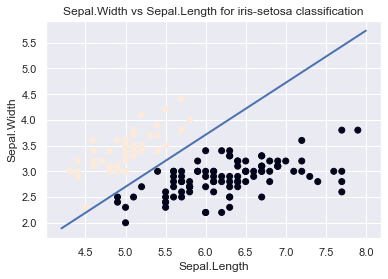

In [94]:
plt.scatter(n_data.loc[:,"Sepal.Length"], n_data.loc[:,"Sepal.Width"], c=n_data.loc[:,'class']) 
x1 = np.linspace(min(n_X.loc[:,"Sepal.Length"])-0.1, max(n_X.loc[:,"Sepal.Length"])+0.1)
plt.plot(x1, -beta0/beta2 - beta1/beta2 *x1, lw=2)
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('Sepal.Width vs Sepal.Length for iris-setosa classification')
plt.show()

### Multiclass Logistic Regression

Multiclass logistic regression is the generalization of logistic regression algorithm. If the logistic regression algorithm used for the multi-classification task (we have more than two possible discrete outcomes), then the same logistic regression algorithm called as the multiclass logistic regression.

<img src="../images/One_vs_rest1.png" style="height: 200px;" >

To implement multiclass classification, there are 2 approaches: **One-versus-the-rest** and **multinomial**.

#### One versus the rest

In this approach, one binary classifier is trained for each class. At prediction time **class with the highest probability** will be selected.

<img src="../images/One_vs_rest2.png" style="height: 300px;" >

#### Multinomial 

Multinomial, also called **Softmax regression**, generates $k$ (for $k$ classes) **probabilities that sum to $1$.** 

The [softmax function](https://en.wikipedia.org/wiki/Softmax_function) is a generalization of the logistic function that  "squashes" a k-dimensional vector z of arbitrary real values to a K-dimensional vector of real values in the range [0, 1] that add up to 1.

<img src="../images/softmax.png" style="height: 500px;" >

#### Example - Mobile Price Dataset

Let's see how the Multinomial logistic regression model can be used for Mobile Price dataset.

In [95]:
# Load data
mobile = pd.read_csv('../data/mobile_price_train.csv')
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [96]:
# Quick summary of each column
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [97]:
# Checking the distribution of target classes
mobile['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

There are 4 price ranges $0$, $1$, $2$ and $3$, corresponding to the cheapest price range ($0$) to the most expensive price range ($3$)

In [98]:
# Separating target from features
X = mobile.drop('price_range', axis=1)
y = mobile['price_range']

In [99]:
# Split data into train/test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.2)
ytrain.shape, ytest.shape

((1600,), (400,))

In [100]:
logreg = LogisticRegression(random_state=42, multi_class='multinomial', solver='newton-cg')
logreg.fit(Xtrain, ytrain)
logreg_pred = logreg.predict(Xtest)
logreg_pred[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [101]:
logreg_prob = logreg.predict_proba(Xtest)
logreg_prob[:10]

array([[9.96054436e-01, 3.94556227e-03, 1.86985765e-09, 3.73595839e-20],
       [3.22654049e-09, 6.60611177e-02, 9.33488439e-01, 4.50440069e-04],
       [1.19880819e-02, 9.87033658e-01, 9.78260116e-04, 9.79135397e-12],
       [3.31063511e-26, 1.34796347e-10, 4.25737032e-03, 9.95742630e-01],
       [5.34191489e-06, 8.64989947e-01, 1.35003007e-01, 1.70367401e-06],
       [3.93516413e-05, 9.16001167e-01, 8.39589387e-02, 5.42397624e-07],
       [3.32340711e-08, 2.52596994e-01, 7.47300971e-01, 1.02002263e-04],
       [9.98646098e-01, 1.35390154e-03, 3.45658170e-10, 6.31882197e-21],
       [5.95180797e-20, 3.21577092e-07, 2.81315692e-02, 9.71868109e-01],
       [1.36763048e-06, 8.16352277e-01, 1.83643019e-01, 3.33686504e-06]])

In [102]:
logreg.score(Xtest, ytest)

0.965

### Exercise 6
#### Classifying fruits with Logistic Regression

Load the fruits data file and apply Logistic Regression to classify fruits.

1. Load Data
2. Examine data
3. Create train-test split
4. Create classifier object
5. Train the classifier (fit the estimator)
6. Estimate the accuracy of the classifier on future data, using the test data

In [103]:
fruits = pd.read_table('../data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [104]:
#  - 2. Examine data
# your code here

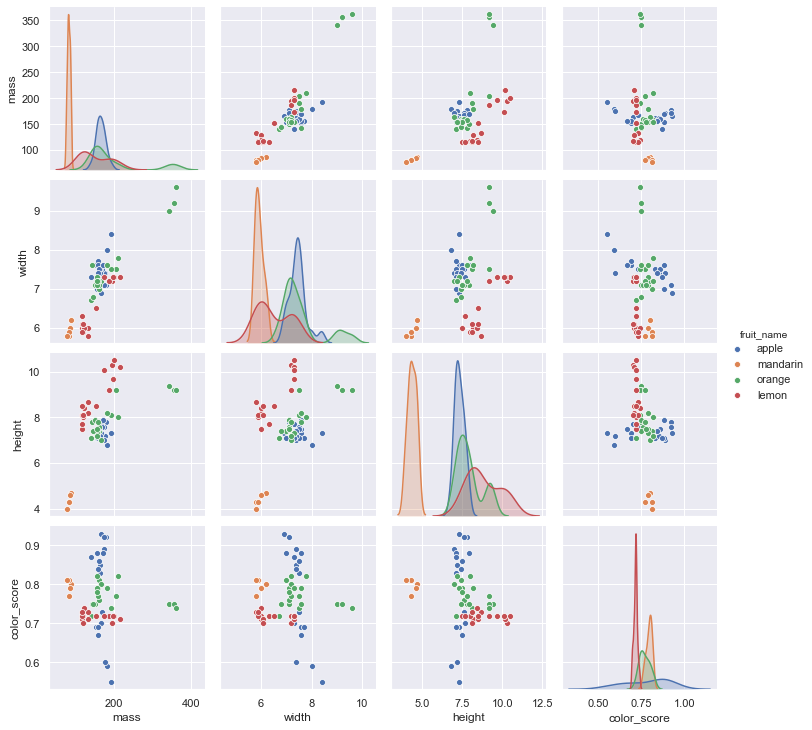

In [105]:
# MC
#  - 2. Examine data
sns.pairplot(fruits[[c for c in fruits.columns if not c == "fruit_label"]], hue='fruit_name');

In [106]:
X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

In [107]:
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [108]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

In [109]:
#  - 3. Create train-test split
# your code here

In [110]:
# MC
#  - 3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [111]:
# your code here

In [112]:
# MC
lr = LogisticRegression(random_state=42, multi_class='multinomial', solver='newton-cg')
lr.fit(X_train, y_train)
print("Accuracy on train set: {}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {}".format(lr.score(X_test, y_test)))

Accuracy on train set: 0.8181818181818182
Accuracy on test data: 0.4666666666666667


## Evaluation Metrics for Classification


### Confusion matrix

<img src='../images/CM.png' style="height: 220px;" align=left>
<img src='../images/confusion1.png' style="height: 190px;" align=right>

|                     | y\_test | prediction |
|:-------------------:|:-------:|:----------:|
| TP (True Positive)  | 1       | 1          |
| TN (True Negative)  | not 1   | not 1      |
| FP (False Positive) | not 1   | 1          |
| FN (Flase Negative) | 1       | not 1      |

<img src='../images/TP_TN.png'  style="height: 450px;"/>

<img src='../images/ConfusionMatrix.png' style="height: 400px;"/>

### Precision
Proba($e\in C$ $|$ $e$ labeled $C$ )
$$P=\frac{TP}{TP + FP}$$

### Recall
Proba($e$ labeled $C$ $|$ $e \in C$)
$$R=\frac{TP}{TP + FN}$$

### F1-score (Harmonic mean of Precision and Recall)
$$F_1-score = 2 \times \frac{P \times R}{P + R}$$

### Accuracy
$$ \frac{TP + TN }{TP + TN + FP + FN}$$

<img src='../images/PercisionRecall.png'  style="height: 300px;"/>

### Python can do it easily!

We can use scikit-learn to calculate the above evaluation metrics easily.

#### Attention: 
1. Python returns the confusion matrix in the following format: [ [TN  FP] [FN  TP] ]
2. Order of ($y\_test$, $y\_pred$) in all the following functions matters.

<img src='../images/confusion1.png' style="height: 150px;" align=right>

In [113]:
# Predict whether a mobile phone is Touch Screen
X = mobile.drop('touch_screen', axis=1)
y = mobile['touch_screen']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Precision = {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall = {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1 = {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy = {:.2f}'.format(accuracy_score(y_test, y_pred)))

Precision = 0.51
Recall = 0.54
F1 = 0.52
Accuracy = 0.51


In [115]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, y_pred) 

print('Confusion Matrix\n', c_mat)
print()
print('TN =', c_mat[0][0])
print('FP =', c_mat[0][1])
print('FN =', c_mat[1][0])
print('TP =', c_mat[1][1])

Confusion Matrix
 [[118 131]
 [116 135]]

TN = 118
FP = 131
FN = 116
TP = 135


### Python can do it even easier!

In [116]:
from sklearn.metrics import classification_report

# Combined report with all above metrics SVM
print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.50      0.47      0.49       249
           1       0.51      0.54      0.52       251

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500



<img src='../images/micro_macro_avg.png' style="height: 300px;">

### Exercise 7
#### Predicting breast_cancer

For this exercise, you will be using the Breast Cancer Wisconsin (Diagnostic) Database that is available from sklearn datasets to create a k-NN and logistic regression classifier to predict the cancer status.

**breast_cancer dataset columns name:**

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

You may find out about the dataset from the description given below.

In [117]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# Print the data set description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.


In [118]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

How many features does the breast cancer dataset have?

In [119]:
# MC
len(cancer.feature_names)

30

Convert the sklearn.dataset `cancer` to a DataFrame.

In [120]:
# MC
breast_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [121]:
# MC
breast_cancer['target'] = cancer.target
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


What is the class distribution? (i.e. how many instances of `malignant` (badkhim /meˈlignant/) and how many `benign` (khosh khim /benain/) ?)

In [122]:
# MC
print(breast_cancer.groupby('target').size())     # 0 = 'malignant'& 1 = 'benign'

target
0    212
1    357
dtype: int64


Split the DataFrame into `X` (the features) and `y` (the labels).

In [123]:
# MC
X = breast_cancer.drop('target', axis=1)
y = breast_cancer['target']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

Set the random number generator state to $0$ using `random_state=0`.

In [124]:
# MC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

Train a k-NN model with `X_train` and `y_train`, using any hyperparameters that you want.

In [125]:
# MC
cancer_knn = KNeighborsClassifier(n_neighbors=5)
cancer_knn.fit(X_train, y_train)

KNeighborsClassifier()

Train a Logistc Regression model with `X_train` and `y_train`.

In [126]:
# MC
cancer_lr = LogisticRegression()
cancer_lr.fit(X_train, y_train)

LogisticRegression()

Predict the class labels for the test set `X_test` using for both models.

In [127]:
# MC
cancer_knn_y_pred = cancer_knn.predict(X_test)
cancer_lr_y_pred = cancer_lr.predict(X_test)

Print the confusion matrix of both models.

In [128]:
# MC
print('KNN')
print(confusion_matrix(y_test, cancer_knn_y_pred))
print()
print('Logistic Regression')
print(confusion_matrix(y_test, cancer_lr_y_pred))

KNN
[[44  3]
 [ 4 63]]

Logistic Regression
[[45  2]
 [ 4 63]]


Find the scores (precision, recall, f1 and accuracy) of both models.

In [129]:
# MC
print('KNN')
print('Precision = {:.2f}'.format(precision_score(y_test, cancer_knn_y_pred)))
print('Recall = {:.2f}'.format(recall_score(y_test, cancer_knn_y_pred)))
print('F1 = {:.2f}'.format(f1_score(y_test, cancer_knn_y_pred)))
print('Accuracy = {:.2f}'.format(accuracy_score(y_test, cancer_knn_y_pred)))
print()
print('Logistic Regression')
print('Precision = {:.2f}'.format(precision_score(y_test, cancer_lr_y_pred)))
print('Recall = {:.2f}'.format(recall_score(y_test, cancer_lr_y_pred)))
print('F1 = {:.2f}'.format(f1_score(y_test, cancer_lr_y_pred)))
print('Accuracy = {:.2f}'.format(accuracy_score(y_test, cancer_lr_y_pred)))

KNN
Precision = 0.95
Recall = 0.94
F1 = 0.95
Accuracy = 0.94

Logistic Regression
Precision = 0.97
Recall = 0.94
F1 = 0.95
Accuracy = 0.95


# Resources

### Linear Regression

- http://www.dataschool.io/applying-and-interpreting-linear-regression/
- http://people.duke.edu/~rnau/regintro.htm
- Assumptions of Linear Regression: http://pareonline.net/getvn.asp?n=2&v=8
- Feature Selection: https://www.datacamp.com/community/tutorials/feature-selection-python
- Feature Engineering: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
- Handling Highly Correlated Features: https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/

### k-Nearest Neighbours

- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
- https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

### Logistic Regression

- https://www.coursera.org/lecture/machine-learning/classification-wlPeP
- https://www.coursera.org/lecture/machine-learning/decision-boundary-WuL1H
- https://www.coursera.org/lecture/ml-classification/intuition-behind-linear-classifiers-lCBwS
- https://www.youtube.com/watch?v=l-EhAIp31HA
- https://www.youtube.com/watch?v=Q81RR3yKn30
- https://www.coursera.org/lecture/machine-learning/regularized-logistic-regression-4BHEy